In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("NSFG_2022_2023_FemRespPUFData.csv")
print(df.shape)
df.head()

(5586, 1912)


,CaseID,RSCRAGE,RSCRNINF,RSCRHISP,RSCRRACE,FTFMODE,DEVICE_TYPE,AGE_R,AGESCRN,HISP,...,CMLSTYR,CMJAN3YR,CMJAN4YR,CMJAN5YR,CMFIVYR,YEAR,QUARTER,PHASE1,PHASE2,PHASE3
0,96064,29,5,5,3,2,Mobile,29,29,5,...,1474,1441,1429,1417,1426,2,4,1,0,0
1,96066,18,5,1,4,2,PC,18,18,1,...,1471,1441,1429,1417,1423,2,2,1,1,1
2,96068,37,1,5,2,2,Mobile,37,37,5,...,1473,1441,1429,1417,1425,2,4,1,0,0
3,96071,40,1,5,3,2,PC,40,40,5,...,1468,1441,1429,1417,1420,2,2,1,0,0
4,96072,49,1,5,2,2,PC,49,49,5,...,1466,1441,1429,1417,1418,2,1,1,1,0


In [3]:
features = [
    'AGE_R', 
    'RSCRRACE',     
    'HIEDUC',
    'RELIGION',
    'RELDLIFE',
    'MARSTAT',      
    'vry1stag',
    'LVSIT14F',
    'LVSIT14M',
    'MENARCHE',
    'ECTIMESX',
    'CONDSEXL',
    'PARTS1YR',
    'CURRPRTT',
    'DRINK12',
    'MALSHT12',
    'ABORTION',
    'WHOFSTPR',
    'ONOWN',
    'POT12',
    'GRFSTSX',
    'TOTINCR',
    "OPPLIFENUM"
]
df_filtered = df.loc[:,features]
print(df_filtered.shape)
df_filtered.info()

(5586, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5586 entries, 0 to 5585
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AGE_R       5586 non-null   int64  
 1   RSCRRACE    5586 non-null   int64  
 2   HIEDUC      5586 non-null   int64  
 3   RELIGION    5586 non-null   int64  
 4   RELDLIFE    3637 non-null   float64
 5   MARSTAT     5586 non-null   int64  
 6   vry1stag    4554 non-null   float64
 7   LVSIT14F    1733 non-null   float64
 8   LVSIT14M    1733 non-null   float64
 9   MENARCHE    5586 non-null   int64  
 10  ECTIMESX    1607 non-null   float64
 11  CONDSEXL    1161 non-null   float64
 12  PARTS1YR    4554 non-null   float64
 13  CURRPRTT    5586 non-null   int64  
 14  DRINK12     5564 non-null   float64
 15  MALSHT12    4057 non-null   float64
 16  ABORTION    3034 non-null   float64
 17  WHOFSTPR    1454 non-null   float64
 18  ONOWN       5586 non-null   int64  
 19  POT12       5561

In [4]:
def print_desc(cols, df_desc):
    mask = df_desc['Variable Name'].isin(cols)
    for i, row in df_desc[mask].iterrows():
        print(f"{row['Variable Name']} : {row['Variable Label']}")

In [5]:
df_var_desc = pd.read_csv("var_code.csv")

In [6]:
print_desc(features, df_var_desc)

MARSTAT : AD-7b R's marital or cohabiting status
ONOWN : AG-0a (before age 18) R ever live away from parents/guardians?
LVSIT14F : AG-3 female parent (figure) living with at age 14 - fam not intact thru 18
LVSIT14M : AG-4 male parent (figure) living with at age 14 - fam not intact thru 18
MENARCHE : BA-1 Age at first menstrual period (bottom-coded)
GRFSTSX : CE-8 Grade R Was in at First Sexual Intercourse (bottom-coded)
WHOFSTPR : CG-3 Who Was Rs First Sexual Partner
RELIGION : Current religious affiliation
ECTIMESX : EA-12 Number of times R used emergency contraception
HIEDUC : Highest completed year of school or highest degree received (bottom-coded)
RELDLIFE : IC-7 How important is religion in R's daily life
DRINK12 : JC-4 Last 12 mos: how often drank alcoholic beverages
POT12 : JC-6 Last 12 mos: how often smoked marijuana
CONDSEXL : JD-11 Was condom used at last sex of any kind with a male partner
MALSHT12 : JF-6 Last 12 mos: R had sex with male intravenous drug user
ABORTION : Num

## Split

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(
    df_filtered, test_size=0.2, random_state=42
)
print("Shape Train:", df_train.shape)
print("Shape Test:", df_test.shape)

Shape Train: (4468, 23)
Shape Test: (1118, 23)


### Dtypes and Cardinality

In [8]:
df_filtered.agg(["nunique", "unique"]).T

,nunique,unique
AGE_R,36,"[29, 18, 37, 40, 49, 30, 25, 44, 28, 47, 21, 1..."
RSCRRACE,4,"[3, 4, 2, 1]"
HIEDUC,11,"[4, 5, 6, 10, 9, 8, 3, 1, 2, 7, 11]"
RELIGION,4,"[4, 2, 1, 3]"
RELDLIFE,5,"[1.0, 2.0, nan, 3.0, 9.0, 8.0]"
MARSTAT,5,"[3, 2, 1, 8, 9]"
vry1stag,34,"[21.0, nan, 17.0, 16.0, 15.0, 22.0, 27.0, 14.0..."
LVSIT14F,5,"[nan, 1.0, 8.0, 2.0, 3.0, 9.0]"
LVSIT14M,6,"[nan, 3.0, 2.0, 1.0, 9.0, 8.0, 4.0]"
MENARCHE,21,"[9, 13, 12, 11, 14, 15, 10, 8, 16, 96, 18, 98,..."


Based on the cardinality, only `vry1stag`, `AGE_R`, `MENARCHE`, and the dependent variable `OPPLIFENUM` can be considered as continous variables.

### Continuous Variables
Here are the changes note:
* `vry1stag` - removed 97 or the ascertained. NA in this column means that a person never had sex thus added new column for those who have not had sex yet. Creating new such column will make the `vry1stag` a categorical one (that ought to be one-hot-encoded). To counteract the explosion in dimensions, we will bin them to the following categories, '<=14 years', '15-17 years', '18-19 years', '20+ years', and 'never had sex'.
* `MENARCHE` - Remove invalid answers (98,99) and then replace 96 (those who have not have their periods yet) to 37 (the max plus 1).
*  `OPPLIFENUM` - Fill the NA with 0 since this is the number of time they had sexual encounters with male. Removed the invalid answers too.  


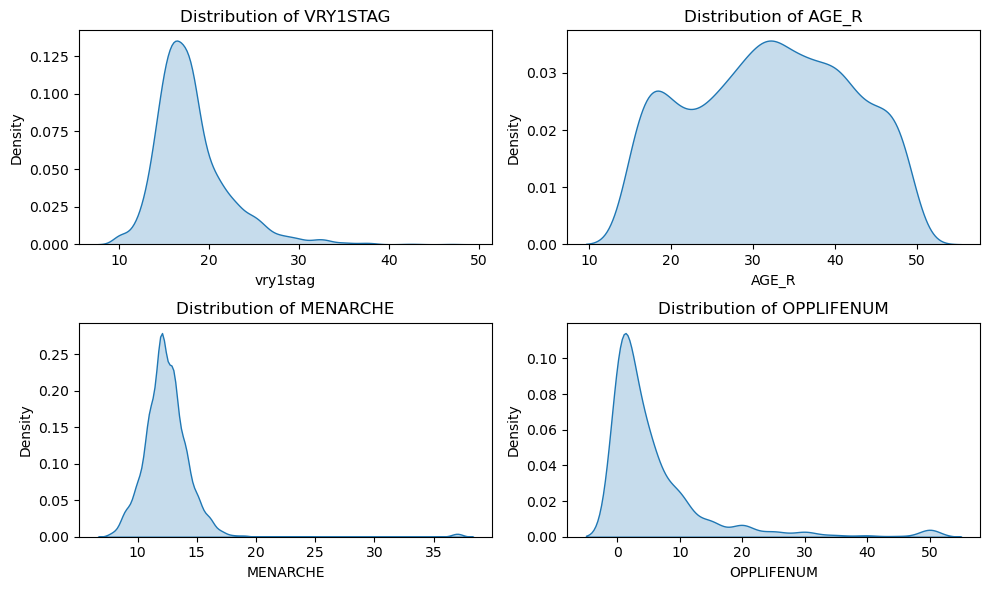

In [9]:
conti = ["vry1stag", 'AGE_R', 'MENARCHE', "OPPLIFENUM"]
df_data = df_train.copy()
#removed not ascertain questions
mask_out = (df_data['vry1stag'] != 97) & (df_data['MENARCHE'].isin([98,99]) == False) & (df_data['OPPLIFENUM'].isin([998,999]) == False)

df_data['OPPLIFENUM'] = df_data['OPPLIFENUM'].fillna(0)
df_data['MENARCHE'] = df_data['MENARCHE'].replace({96 : 37})
rows = int(np.ceil(len(conti)/2))
fig, ax= plt.subplots(ncols=2, nrows=rows, figsize=(10,rows*3))
ax = ax.flatten()

for i, col in enumerate(conti):
    sns.kdeplot(
        df_data[mask_out][col],
        fill=True,
        ax=ax[i]
    )
    ax[i].set_title(f"Distribution of {col.upper()}")

plt.tight_layout()

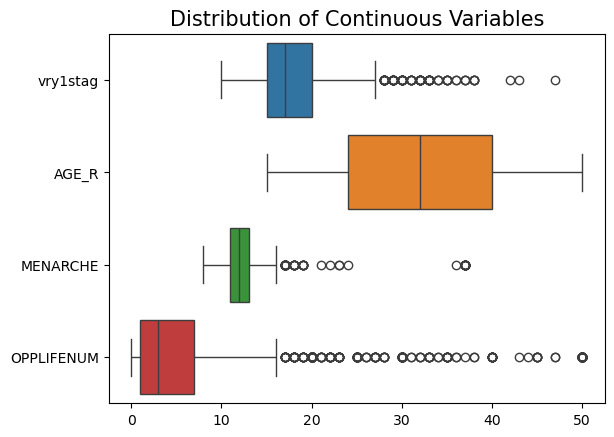

In [10]:
conti = ["vry1stag", 'AGE_R', 'MENARCHE', "OPPLIFENUM"]
         
sns.boxplot(
    df_data[mask_out][conti], 
    orient="h"
)

plt.title("Distribution of Continuous Variables", size=15);

Since there exists significant numbers of outliers, especially in the dependent variable, and they cannot be removed since they are genuine observations, overdispersion is very likely possibility. However, for the sake of the activity, we shall stick with Poisson Regression. But if overdispersion exists, we shall resort to Negative Binomial Regression instead for the final model.

## Categorical Variables

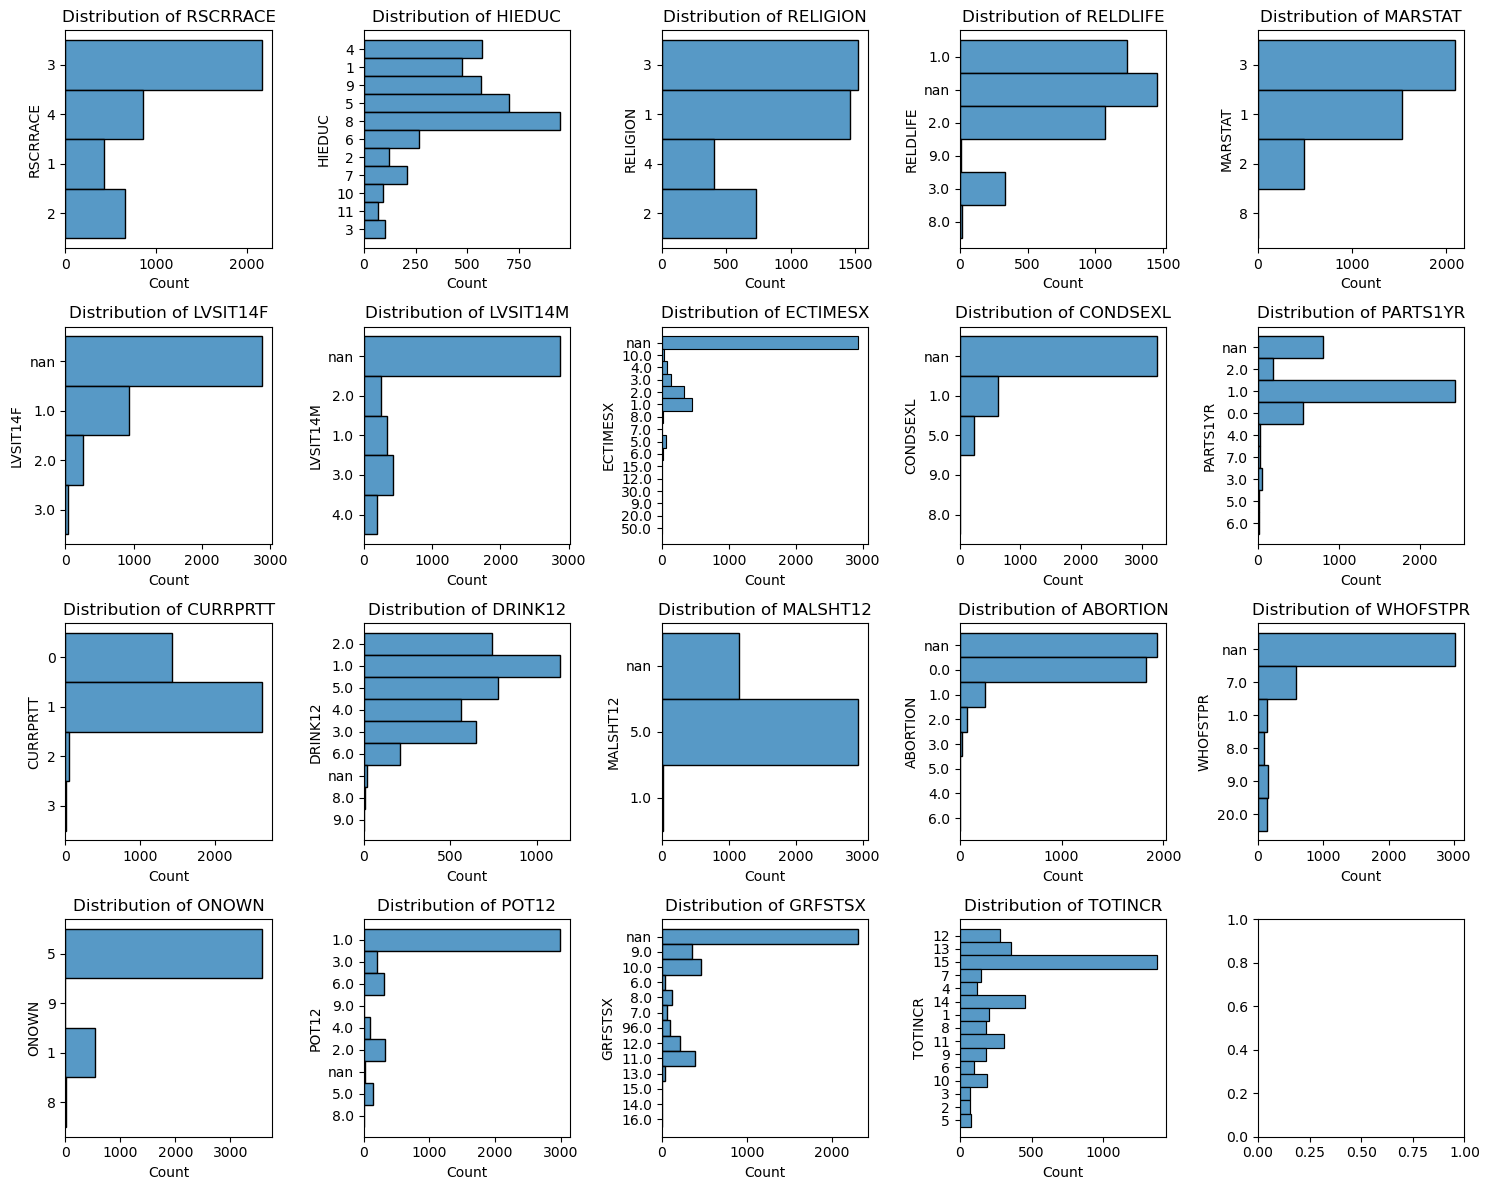

In [11]:
cols = df_train.drop(columns=conti).columns
rows = int(np.ceil(len(cols)/5))
fig, ax= plt.subplots(ncols=5, nrows=rows, figsize=(15,rows*3))
ax = ax.flatten()
mask_out = ((df_data['vry1stag'] != 97) & 
                (df_data['LVSIT14F'].isin([8,9]) == False) & 
                (df_data['LVSIT14M'].isin([8,9]) == False) &
                (df_data['ECTIMESX'].isin([98,99]) == False)&
                (df_data['CONDSEXL'].isin([98,99]) == False)&
                (df_data['MALSHT12'].isin([8,9]) == False) &
                (df_data['WHOFSTPR'].isin([98,99]) == False)&
                (df_data['GRFSTSX'].isin([98,99]) == False) &
                (df_data['MENARCHE'].isin([98,99]) == False) &
                (df_data['OPPLIFENUM'].isin([998,999]) == False)
                )
for i, col in enumerate(cols):
    sns.histplot(
        y=df_data[mask_out][col].astype(str),
        fill=True,
        ax=ax[i]
    )
    ax[i].set_title(f"Distribution of {col.upper()}")

plt.tight_layout()


### Missing Values

In [12]:
df_train.isna().sum()

AGE_R            0
RSCRRACE         0
HIEDUC           0
RELIGION         0
RELDLIFE      1559
MARSTAT          0
vry1stag       836
LVSIT14F      3098
LVSIT14M      3098
MENARCHE         0
ECTIMESX      3184
CONDSEXL      3546
PARTS1YR       836
CURRPRTT         0
DRINK12         19
MALSHT12      1243
ABORTION      2053
WHOFSTPR      3290
ONOWN            0
POT12           22
GRFSTSX       2459
TOTINCR          0
OPPLIFENUM     761
dtype: int64

Based on the *Codebook* file with consideration initial exploration, here are the implemented changes and masking done.

| Variable       | Wrangling Steps                                                                                                                                                              |
| :------------- | :--------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **OPPLIFENUM** | - `NaN` values filled with `0`. <br> - Rows where `OPPLIFENUM` is `998` or `999` are dropped.                                                                                    |
| **TOTINC**     | - Rows with `NaN` values in `TOTINC` are dropped.                                                                                                                              |
| **RELDLIFE**   | - Values replaced: `"8"` -> `4`, `"9"` -> `5`, `NaN` -> `6`.                                                                                                                   |
| **vry1stag**   | - Rows where `vry1stag` is `97` are dropped. <br> - Binned into categories: `'<=14 years'`, `'15-17 years'`, `'18-19 years'`, `'20+ years'`. `NaN`s become `"Never Had sex"`. <br> - This binned version is then One-Hot Encoded (original `vry1stag` column effectively replaced by dummies). |
| **LVSIT14F**   | - Rows where `LVSIT14F` is `8` or `9` are dropped. <br> - Values mapped using `map_f` (e.g., `1` -> `"Bio/adoptive mother"`, `None` -> `"both parents"`). <br> - Then One-Hot Encoded (original `LVSIT14F` column replaced by dummies). <br> - The specific dummy column `LVSIT14F_both parents` is dropped at the end. |
| **LVSIT14M**   | - Rows where `LVSIT14M` is `8` or `9` are dropped. <br> - Values mapped using `map_m` (e.g., `1` -> `"Bio/adoptive mother"`, `None` -> `"both parents"`). <br> - Then One-Hot Encoded (original `LVSIT14M` column replaced by dummies). |
| **ECTIMESX**   | - Rows where `ECTIMESX` is `98` or `99` are dropped. <br> - `NaN` values replaced with `"Never"`. <br> - Non-"Never" values are clustered using kmediod with Manhattan Distance; column updated with cluster labels. <br> - Then One-Hot Encoded (original `ECTIMESX` column replaced by dummies). |
| **CONDSEXL**   | - Rows where `CONDSEXL` is `98` or `99` are dropped. <br> - Values replaced: `NaN` -> `"inapplicable"`, `5` -> `0`. <br> - Then One-Hot Encoded (original `CONDSEXL` column replaced by dummies). |
| **MALSHT12**   | - Rows where `MALSHT12` is `8` or `9` are dropped. <br> - Transformed into multiple binary columns (`MALSHT12_0` to `MALSHT12_7`): `1` if `MALSHT12` equals the value (and not `NaN`), else `0`. <br> - Original `MALSHT12` column dropped. |
| **WHOFSTPR**   | - Rows where `WHOFSTPR` is `98` or `99` are dropped. <br> - Transformed into multiple binary columns (e.g., `WHOFSTPR_{val}` for each unique value): `1` if `WHOFSTPR` equals `val` (and not `NaN`), else `0`. <br> - Original `WHOFSTPR` column dropped. |
| **GRFSTSX**    | - Rows where `GRFSTSX` is `98` or `99` are dropped. <br> - `NaN` values filled with `"nosex_u18"`. <br> - Values mapped using `map_gr` (e.g., `14` -> `13`). <br> - Then One-Hot Encoded (original `GRFSTSX` column replaced by dummies). |
| **MENARCHE**   | - Rows where `MENARCHE` is `98` or `99` are dropped. <br> - Value `96` replaced with `37`. (Remains as a numerical column).                                                    |
| **PARTS1YR**   | - Value `5` replaced with `0`. <br> - Transformed into two binary columns: `PARTS1YR_no` (`1` if `PARTS1YR == 0` and not `NaN`), `PARTS1YR_yes` (`1` if `PARTS1YR == 1` and not `NaN`). <br> - Original `PARTS1YR` column dropped. |
| **ABORTION**   | - New column `Abortion_num` created, which is `ABORTION` with `NaN`s filled by `0`. <br> - Original `ABORTION` column dropped.                                                  |

### Clustering Code
Clustered using KMediod to consider the non Normal Distribution of the column `ECTIMESX`. Found the best k by calculation and *intertia* and *silhouette score* of each k. Standardize them then get the weighted average of the negative *intertia* (since lower is better) and *silhouette score* (since higher is better). The weight is 0.7 for *silhouette score* due to importance of distinctiveness between clusters over the compactness that the *inertia* calculates.

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import kmedoids
import pickle

def cluster_this(X, col):
    n_clusters = range(2,13)
    inertia_errors = []
    silhouette_scores = []
    ss = StandardScaler()

    X_scaled = ss.fit_transform(X[[col]])
    # X_scaled_df = pd.DataFrame(X_scaled, columns=[col])
    

    for k in n_clusters:
        kmed = kmedoids.KMedoids(k, metric="manhattan", random_state=42)
        kmed.fit(X_scaled)
        inertia_errors.append(kmed.inertia_)
        silhouette_scores.append(silhouette_score(X_scaled, kmed.labels_))
    
    intertia = np.array(inertia_errors)
    mean_i = np.mean(intertia)
    std_i = np.std(intertia)
    stdz_i = (intertia - mean_i )/ std_i
    stdz_i = stdz_i*-1

    silhouette =   np.array(silhouette_scores)
    mean_s = np.mean(silhouette)
    std_s = np.std(silhouette)
    stdz_s = (silhouette - mean_s )/ std_s

    weight_inertia = 0.3
    weight_silhouette = 0.7

    combined_score = (weight_inertia * stdz_i) + (weight_silhouette * stdz_s)
    result = pd.Series(combined_score).sort_values(ascending=False)
    result.index = result.index + 2

    return result

def train_cluster(X, col, k):
    ss = StandardScaler()
    X_scaled = ss.fit_transform(X[[col]].values)
    
    kmed = kmedoids.KMedoids(k, metric="manhattan", random_state=42)
    kmed.fit(X_scaled)
    
    with open(f"clustering_models/{col}_cluster.pkl", "wb") as f:
        pickle.dump((kmed, ss), f)
        print("Model saved to:", f"clustering_models/{col}_cluster.pkl")
    
    return kmed.labels_

def predict_cluster(X, col):
    with open(f"clustering_models/{col}_cluster.pkl", "rb") as f:
        loaded_model, scaler = pickle.load(f)
    
    X_scaled = scaler.transform(X[[col]].values)
    
    raw_prediction = loaded_model.predict(X_scaled)
    medoid_to_label = {idx: i for i, idx in enumerate(loaded_model.medoid_indices_)}
    labels = np.array([medoid_to_label.get(idx, -1) for idx in raw_prediction])
    
    return labels

In [14]:
samp = df_train['ECTIMESX'].dropna()
samp_frame = samp[samp < 80].to_frame()

cluster_this(samp_frame, 'ECTIMESX')

12    0.898516
11    0.850383
10    0.828359
9     0.693019
8     0.560741
7     0.465617
6     0.300801
5    -0.141694
4    -0.841484
3    -1.709144
2    -1.905113
dtype: float64

Choose 10 relatively effective but simpler clusters.

In [15]:
train_cluster(samp_frame, 'ECTIMESX', 10)

Model saved to: clustering_models/ECTIMESX_cluster.pkl


array([7, 3, 9, ..., 8, 4, 0], dtype=uint64)

In [16]:
labels = predict_cluster(samp_frame, "ECTIMESX")
pd_labels = pd.concat([samp_frame, pd.Series(labels, index=samp_frame.index).rename("cluster")], axis=1).groupby("cluster").agg(['median', 'max', 'min'])
sorted = pd_labels.loc[pd_labels['ECTIMESX']['median'].argsort()]
map_ect = {cluster : i for i,cluster in enumerate(sorted.index)}
sorted

ECTIMESX            
          median   max   min
cluster                     
9            1.0   1.0   1.0
8            2.0   2.0   2.0
4            3.0   3.0   3.0
3            4.0   4.0   4.0
0            5.0   5.0   5.0
5            6.0   6.0   6.0
2            8.0   9.0   7.0
7           10.0  12.0  10.0
6           15.0  20.0  15.0
1           30.0  50.0  30.0

### Wrangle Function

In [17]:
map_f = {
    1: "Bio/adoptive mother",
    2: "Other mother figure",
    3: "No mother figure",
    None : "both parents"
}

map_m = {
    1: "Bio/adoptive mother",
    2: "Bio/adoptive father",
    3: "Step father",
    4: "Other father figure",
    None : "both parents"
}

map_gr = {
    14 : 13,
    15: 13,
    16 : 13,
    16 : 13
}

mappings = {
    "LVSIT14F" : map_f,
    "LVSIT14M" : map_m,
    "GRFSTSX" : map_gr
}


def wrangle(X, mappings):
    df_data = X.copy()

    to_one_hot = []
    to_cluster = []

    df_data['OPPLIFENUM'] = df_data['OPPLIFENUM'].fillna(0)
    to_drop_dependent = df_data['OPPLIFENUM'].isin([998,999])
    
    print("Invalid Dependent Rows (Refused and Don't Know):", to_drop_dependent.sum())

    df_data = df_data[~to_drop_dependent]
    
    current_n = len(df_data)
    
    df_data['RELDLIFE'] = df_data['RELDLIFE'].replace({
            8 : 4,
            9 : 5,
            np.nan : 6
        })
    
    # drop shits
    mask_out = ((df_data['vry1stag'] != 97) & 
                (df_data['LVSIT14F'].isin([8,9]) == False) & 
                (df_data['LVSIT14M'].isin([8,9]) == False) &
                (df_data['ECTIMESX'].isin([98,99]) == False)&
                (df_data['CONDSEXL'].isin([98,99]) == False)&
                (df_data['MALSHT12'].isin([8,9]) == False) &
                (df_data['WHOFSTPR'].isin([98,99]) == False)&
                (df_data['GRFSTSX'].isin([98,99]) == False) &
                (df_data['MENARCHE'].isin([98,99]) == False) &
                (df_data['MARSTAT'].isin([8,9]) == False) &
                (df_data['DRINK12'].isin([9]) == False) &
                (df_data['POT12'].isin([9]) == False) &
                (df_data['ONOWN'].isin([8,9]) == False)
                )
    df_data = df_data[mask_out]

    #MENARCHE handling
    df_data['MENARCHE'] = df_data['MENARCHE'].replace({96 : 37})
    
    #ECTIMESX handling
    ect = df_data['ECTIMESX'].replace({np.nan : "Never"})
    mask_ect = (ect != "Never")
    ect = ect[mask_ect].astype(float).to_frame()
    to_cluster.append(["ECTIMESX", mask_ect])
    
    #CONDSEXL handling
    df_data['CONDSEXL'] =   df_data['CONDSEXL'].replace({np.NaN : "inapplicable", 5:0})
    to_one_hot.append(df_data['CONDSEXL'])
    
    #PARTS1YR handling
    had_sex = df_data['PARTS1YR'].isna() == False
    df_data['PARTS1YR'] = df_data['PARTS1YR'].replace({5:0})
    map_par = ["no", "yes"]
    for i in range(2):
        df_data[f'PARTS1YR_{map_par[i]}'] = ((df_data['PARTS1YR'] == i) & had_sex).astype(int)
    df_data.drop(columns="PARTS1YR", inplace=True)
    
    #MALSHT12 handling
    had_sex = df_data['MALSHT12'].isna() == False
    for i in df_data['MALSHT12'].dropna().unique():
        df_data[f'MALSHT12_{i}'] = ((df_data['MALSHT12'] == i) & had_sex).astype(int)
    df_data.drop(columns="MALSHT12", inplace=True)

    #ABORTION handling
    df_data['Abortion_num'] = df_data['ABORTION'].fillna(0)
    df_data.drop(columns="ABORTION", inplace=True)

    #WHOFSTPR handling
    applicable = df_data['WHOFSTPR'].isna() == False
    unique_val = df_data['WHOFSTPR'].dropna().unique()
    for val in unique_val:
        df_data[f"WHOFSTPR_{val}"] =  ((df_data['WHOFSTPR'] == val) & applicable).astype(int)
    df_data.drop(columns="WHOFSTPR", inplace=True)


    #GRFSTSX handling
    df_data['GRFSTSX'] = df_data['GRFSTSX'].fillna("nosex_u18")

    #DRINK12 handling
    to_one_hot.append(df_data['DRINK12'])    

    #POT12 handling
    to_one_hot.append(df_data['POT12'])

    #Clustering loop
    for col, mask in to_cluster:
        data_to_predict = df_data[mask][[col]]
        labels = predict_cluster(data_to_predict, col)
        df_data.loc[data_to_predict.index, col] = labels
        to_one_hot.append(df_data[col])


    first_sex = pd.cut(df_data['vry1stag'], 
        bins=[0, 14, 17, 19, 49],
        labels=['<=14 years', '15-17 years', '18-19 years', '20+ years']
            ).astype(str)
    first_sex[first_sex == "nan"] = "Never Had sex"
    to_one_hot.append(first_sex)

    #mapping loop
    for key, map in mappings.items():
        df_data[key] = df_data[key].map(map)
        to_one_hot.append(df_data[key])

    
    combine = []
    for col in to_one_hot:
        dum_temp = pd.get_dummies(col, dtype=int, drop_first=True, prefix=col.name)
        combine.append(dum_temp)
        df_data.drop(columns=col.name, inplace=True)

    combine.append(df_data)
    
    df_final = pd.concat(combine, axis=1)

    latest_n = len(df_final)
    print(f"Total Rows Dropped: {(current_n - latest_n)*100/current_n}%")

    df_final.drop(columns="LVSIT14F_both parents", inplace=True)

    cols = df_final.columns
    cols_processed =[f'{col.replace(".0", "").replace("+", "more").replace(" ", "_").replace("<=", "leq").replace("/", "or").replace("-", "_")}' for col in cols]
    df_final.columns = cols_processed

    return df_final
df_clean = wrangle(df_train, mappings=mappings)

Invalid Dependent Rows (Refused and Don't Know): 253
Total Rows Dropped: 2.8469750889679717%


In [18]:
df_clean.agg(["unique"]).T

,unique
CONDSEXL_1,"[0, 1]"
CONDSEXL_8,"[0, 1]"
CONDSEXL_9,"[0, 1]"
CONDSEXL_inapplicable,"[1, 0]"
DRINK12_2,"[1, 0]"
DRINK12_3,"[0, 1]"
DRINK12_4,"[0, 1]"
DRINK12_5,"[0, 1]"
DRINK12_6,"[0, 1]"
DRINK12_8,"[0, 1]"


### Correlation

Text(0.5, 1.0, 'Correlation Heatmap of the Processed Dataset')

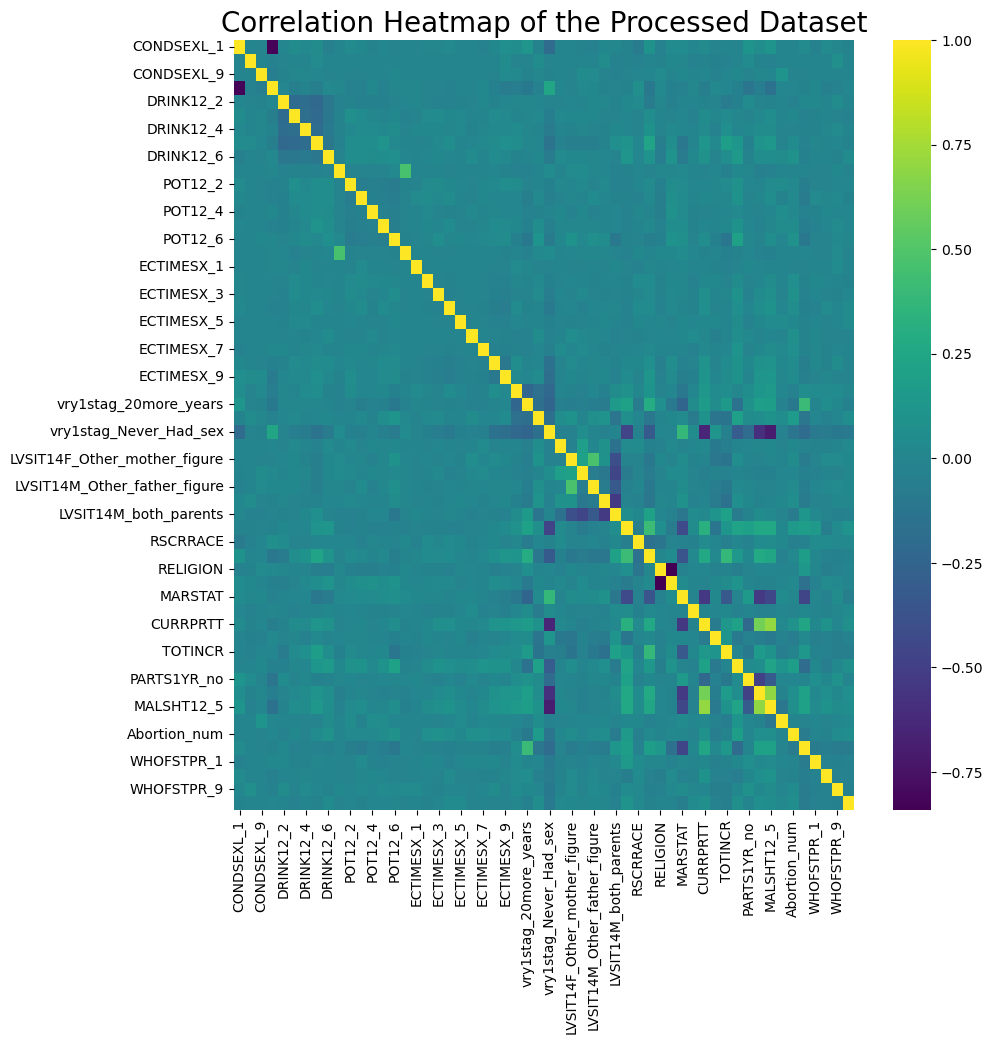

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(
    df_clean.corr(),
    cmap="viridis"
)
plt.title("Correlation Heatmap of the Processed Dataset", size=20)

In [20]:
corr = df_clean.corr().stack().rename("PearsonCorrelation").reset_index()
mask = (corr['level_0'] != corr['level_1']) & (corr['PearsonCorrelation'] >= 0.70)
corr[mask]

,level_0,level_1,PearsonCorrelation
2400,CURRPRTT,MALSHT12_5,0.702254
2730,MALSHT12_5,CURRPRTT,0.702254


We can still make do with .70 correlation.

---
## Baseline

In [ ]:
from scipy import stats

def neg_log_likelihood_nb(y_true, mu, alpha):
    n = 1.0 / alpha

    p = n / (n + mu)
    
    # Calculate log-likelihood
    log_likelihood = np.sum(stats.nbinom.logpmf(y_true, n, p))
    
    return -log_likelihood

In [41]:
df_test_clean = wrangle(df_test, mappings)

Invalid Dependent Rows (Refused and Don't Know): 54
Total Rows Dropped: 2.537593984962406%


In [44]:
alpha = 0.5
baseline_score = neg_log_likelihood_nb(df_test_clean['OPPLIFENUM'], df_test_clean['OPPLIFENUM'].mean(), alpha)
print(f"Negative log-likelihood: {baseline_score}")

Negative log-likelihood: 3233.5916800641558



## Modelling
Let us start with Poisson Regression with regularization for feature selection. To find the best hyperparametes, GridSearch will be done with kfold=5.

In [ ]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import KFold
from itertools import product
from sklearn.metrics import mean_squared_error

formula = 'OPPLIFENUM ~ ' + " + ".join(df_clean.drop(columns=["OPPLIFENUM"]))

alphas = [0.01, 0.1, 0.5, 1.0, 10.0]
l1_wts = [0.1, 0.5, 0.9, 1.0]

best_score = float('inf')
best_params = {}
results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha, l1_wt in product(alphas, l1_wts):
    cv_scores = []
    
    for train_idx, val_idx in kf.split(df_clean):
        train_data = df_clean.iloc[train_idx]
        val_data = df_clean.iloc[val_idx]
        
        re_model = smf.glm(formula=formula, data=train_data, family=sm.families.Poisson())
        
        try:
            model_fit = re_model.fit_regularized(
                method='elastic_net',
                alpha=alpha,
                L1_wt=l1_wt,
                maxiter=2000
            )
            
            predictions = model_fit.predict(val_data)
            score = mean_squared_error(val_data['OPPLIFENUM'], predictions)
            cv_scores.append(score)
        except:
            cv_scores.append(float('inf'))
    
    avg_score = np.mean(cv_scores)
    results.append({
        'alpha': alpha,
        'L1_wt': l1_wt,
        'avg_mse': avg_score
    })
    
    if avg_score < best_score:
        best_score = avg_score
        best_params = {
            'alpha': alpha,
            'L1_wt': l1_wt
        }

results_df = pd.DataFrame(results)
print("Best parameters:", best_params)
print("Best MSE:", best_score)

In [ ]:
results_df.sort_values("avg_nle").head(5)

,alpha,L1_wt,avg_nle
8,0.5,0.1,2127.942578
12,1.0,0.1,2156.798735
9,0.5,0.5,2200.142747
13,1.0,0.5,2249.203310
14,1.0,0.9,2289.967016


Technically, the best parameters are {'alpha': 0.5, 'L1_wt': 0.1}. But let us choose {'alpha': 1, 'L1_wt': 0.1} for a relatively (but lower) simillar score but much more simpler model. For interpretability purpose, it is within our interest to choose a regularization parameter that's stricter (without sacrificing much predictive power) to come up with simpler model. Choosing an 'alpha' = 1 will make that happen.

In [23]:
best_params_poisson ={'alpha': 1, 'L1_wt': 0.1}

In [45]:
response = "OPPLIFENUM"

formula = f'{response} ~ ' + " + ".join(df_clean.drop(columns=[response]))
re_model = smf.glm(formula=formula, data=df_clean, family=sm.families.Poisson())
regularized_results = re_model.fit_regularized(
            method='elastic_net',
            alpha=best_params_poisson['alpha'],         
            L1_wt=best_params_poisson['L1_wt'],
            maxiter=10000
        )
regularized_results

In [46]:
params_valid = regularized_results.params[regularized_results.params != 0]
params_valid.sort_values(ascending=False)

MALSHT12_5                0.295353
vry1stag_leq14_years      0.234658
POT12_6                   0.215188
CURRPRTT                  0.180597
Abortion_num              0.165174
HIEDUC                    0.100568
DRINK12_6                 0.089629
RSCRRACE                  0.089011
PARTS1YR_no               0.083832
DRINK12_5                 0.071110
RELDLIFE                  0.060188
MENARCHE                  0.038129
WHOFSTPR_8               -0.004190
TOTINCR                  -0.008895
PARTS1YR_yes             -0.051432
vry1stag_20more_years    -0.249975
WHOFSTPR_7               -0.328606
vry1stag_Never_Had_sex   -0.364961
dtype: float64

In [47]:
formula = 'OPPLIFENUM ~ ' + " + ".join(params_valid.index)
unr_model = smf.glm(formula=formula, data=df_clean, family=sm.families.Poisson())
unregularized_results_pois = unr_model.fit()
unregularized_results_pois.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM                AIC:              30757.7460 
Link Function:         Log                BIC:              -14311.7506
Dependent Variable:    OPPLIFENUM         Log-Likelihood:   -15360.    
Date:                  2025-05-15 16:06   LL-Null:          -23998.    
No. Observations:      4095               Deviance:         19590.     
Df Model:              18                 Pearson chi2:     3.86e+04   
Df Residuals:          4076               Scale:            1.0000     
Method:                IRLS                                            
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               1.5912   0.0628  25.3491 0.0000  1.4682  1.7142
DRINK12_5               0.1637   0.0155  10.5435 0.0000  0.1333  0.1942
DRINK12_6               0.3911   0.0222  17.5842 0.0000  0.3475  0.4347
POT12_6                 0.3854   0.0184  20.9896 0.0000  0.3494  0.4213
vry1stag_20more_years  -0.5245   0.0211 -24.8097 0.0000 -0.5659 -0.4831
vry1stag_leq14_years    0.2633   0.0169  15.6204 0.0000  0.2302  0.2963
vry1stag_Never_Had_sex -2.8250   0.0608 -46.4642 0.0000 -2.9441 -2.7058
RSCRRACE                0.0139   0.0081   1.7242 0.0847 -0.0019  0.0298
HIEDUC                  0.0768   0.0032  24.1582 0.0000  0.0706  0.0831
RELDLIFE                0.0253   0.0030   8.4353 0.0000  0.0194  0.0312
MENARCHE               -0.0019   0.0035  -0.5378 0.5907 -0.0087  0.0049
CURRPRTT                0.0274   0.0156   1.7599 0.0784 -0.0031  0.0579
TOTINCR                -0.0041   0.0018  -2.3005 0.0214 -0.0075 -0.0006
PARTS1YR_no            -0.2438   0.0284  -8.5936 0.0000 -0.2994 -0.1882
PARTS1YR_yes           -0.5798   0.0173 -33.4342 0.0000 -0.6138 -0.5458
MALSHT12_5              0.3678   0.0280  13.1211 0.0000  0.3129  0.4228
Abortion_num            0.1138   0.0093  12.2324 0.0000  0.0955  0.1320
WHOFSTPR_7             -1.3551   0.0355 -38.1960 0.0000 -1.4247 -1.2856
WHOFSTPR_8             -1.2267   0.0725 -16.9259 0.0000 -1.3687 -1.0846
=======================================================================

"""

In [48]:
overdispersion = unregularized_results_pois.deviance / unregularized_results_pois.df_resid

if overdispersion > 1.3:
    print(f"Overdispersion occurs\nvalue = {overdispersion}")
else:
    print(f"Overdispersion did not occur\nvalue = {overdispersion}")

Overdispersion occurs
value = 4.8062976016890175


Since overdispersion exists, as was expected earlier, let us conduct a Negative Binomial Regression instead and grid search for best alpha value. For the sake of time efficiency, the tuning of both the alpha and L1_wt in regularized fitting will be ommited and will instead use the previously acquired parameters from the Poisson Regression.

For reference, the training time including the regularized fitting parameters will tally up to 18 hours.

In [ ]:
from tqdm import tqdm


def neg_log_likelihood_nb(y_true, mu, alpha):
    n = 1.0 / alpha

    p = n / (n + mu)
    
    # Calculate log-likelihood
    log_likelihood = np.sum(stats.nbinom.logpmf(y_true, n, p))
    
    return -log_likelihood

formula = 'OPPLIFENUM ~ ' + " + ".join(df_clean.drop(columns=["OPPLIFENUM"]))

alphas_binom = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0, 5.0, 10.0]
best_score = float('inf')
best_params_binom = {}
results = []

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in tqdm(alphas_binom):
    cv_scores = []
    
    for train_idx, val_idx in kf.split(df_clean):
        train_data = df_clean.iloc[train_idx]
        val_data = df_clean.iloc[val_idx]
        
        re_model = smf.glm(formula=formula, data=train_data, family=sm.families.NegativeBinomial(alpha=alpha))
        
        try:
            model_fit = re_model.fit_regularized(
                method='elastic_net',
                alpha=best_params_poisson['alpha'],
                L1_wt=best_params_poisson['L1_wt'],
                maxiter=2000
            )
            
            predictions = model_fit.predict(val_data)
            score = mean_squared_error(val_data['OPPLIFENUM'], predictions)
            cv_scores.append(score)
        except:
            cv_scores.append(float('inf'))
    
    avg_score = np.mean(cv_scores)
    results.append({
        'alpha': best_params_poisson['alpha'],
        'L1_wt': best_params_poisson['L1_wt'],
        'alpha_binom': alpha,
        'avg_mse': avg_score
    })
    
    if avg_score < best_score:
        best_score = avg_score
        best_params_binom = {
            'alpha': best_params_poisson['alpha'],
            'L1_wt': best_params_poisson['L1_wt'],
            'alpha_binom': alpha
        }

results_binom_df = pd.DataFrame(results)
print("Best parameters:", best_params_binom)
print("Best MSE:", best_score)

100%|██████████| 8/8 [05:50<00:00, 43.81s/it]

Best parameters: {'alpha': 1, 'L1_wt': 0.1, 'alpha_binom': 1.0}
Best NLL: 2273.3664957068368


In [24]:
best_params_binom = {'alpha': 1, 'L1_wt': 0.1, 'alpha_binom': 1.0}

In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import KFold
from itertools import product

In [49]:
formula = 'OPPLIFENUM ~ ' + " + ".join(df_clean.drop(columns=["OPPLIFENUM"]))

final_model = smf.glm(
    formula=formula, 
    data=df_clean, 
    family=sm.families.NegativeBinomial(alpha=best_params_binom['alpha_binom'])
)

final_results_binom = final_model.fit_regularized(
    method='elastic_net',
    alpha=best_params_binom['alpha'],
    L1_wt=best_params_binom['L1_wt'],
    maxiter=2000,
    cnvrg_tol=1e-6
)

selected_params = final_results_binom.params[final_results_binom.params != 0]
print(f"Selected parameters: \n{selected_params}")

Selected parameters: 
vry1stag_Never_Had_sex   -0.027922
AGE_R                     0.044761
HIEDUC                    0.035863
RELDLIFE                  0.047888
CURRPRTT                  0.012464
TOTINCR                  -0.013218
MALSHT12_5                0.033250
dtype: float64


In [50]:
formula = 'OPPLIFENUM ~ ' + " + ".join(selected_params.index)
unr_model = smf.glm(formula=formula, data=df_clean, family=sm.families.NegativeBinomial(alpha=best_params_binom['alpha_binom']))
unregularized_results_binom = unr_model.fit()
unregularized_results_binom.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                   Results: Generalized linear model
=======================================================================
Model:                 GLM                AIC:              21375.9683 
Link Function:         Log                BIC:              -29926.0498
Dependent Variable:    OPPLIFENUM         Log-Likelihood:   -10680.    
Date:                  2025-05-15 16:08   LL-Null:          -11746.    
No. Observations:      4095               Deviance:         4067.7     
Df Model:              7                  Pearson chi2:     1.66e+04   
Df Residuals:          4087               Scale:            1.0000     
Method:                IRLS                                            
-----------------------------------------------------------------------
                        Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               0.5724   0.1058   5.4117 0.0000  0.3651  0.7797
vry1stag_Never_Had_sex -2.2110   0.0863 -25.6147 0.0000 -2.3802 -2.0418
AGE_R                   0.0244   0.0022  10.9652 0.0000  0.0200  0.0287
HIEDUC                  0.0276   0.0082   3.3518 0.0008  0.0115  0.0438
RELDLIFE                0.0787   0.0084   9.3693 0.0000  0.0622  0.0951
CURRPRTT               -0.1281   0.0502  -2.5518 0.0107 -0.2264 -0.0297
TOTINCR                -0.0197   0.0048  -4.0949 0.0000 -0.0291 -0.0103
MALSHT12_5              0.5269   0.0624   8.4417 0.0000  0.4046  0.6493
=======================================================================

"""

In [51]:
overdispersion = unregularized_results_binom.deviance / unregularized_results_binom.df_resid

if overdispersion > 1.3:
    print(f"Overdispersion occurs\nvalue = {overdispersion}")
else:
    print(f"Overdispersion did not occur\nvalue = {overdispersion}")

Overdispersion did not occur
value = 0.9952685660322057


---
## Evaluation

In [ ]:
results = []
y_actual = df_test_clean['OPPLIFENUM']
y_train = df_clean['OPPLIFENUM']

# baseline
score = mean_squared_error(y_actual, y_actual.mean())
score_1 = mean_squared_error(y_train, y_actual.mean())

results.append({
    "model" : "Baseline",
    "params" : 0,
    "test_mse" : score,
    "train_mse" : score_1
})
# Unr Binom
y_pred = unregularized_results_binom.predict(df_test_clean)
score = mean_squared_error(y_actual, y_pred)
score_1 = mean_squared_error(y_train, unregularized_results_binom.predict(df_clean))

results.append({
    "model" : "Binom_unr",
    "params" : len(unregularized_results_binom.params),
    "test_mse" : score,
    "train_mse" : score_1
})
# Reg Binom
y_pred = final_results_binom.predict(df_test_clean)
score = mean_squared_error(y_actual, y_pred)
score_1 = mean_squared_error(y_train, final_results_binom.predict(df_clean))

results.append({
    "model" : "Binom_reg",
    "params" : len(final_results_binom.params),
    "test_mse" : score,
    "train_mse" : score_1
})
# Unr Pois
y_pred = unregularized_results_pois.predict(df_test_clean)
score = mean_squared_error(y_actual, y_pred)
score_1 = mean_squared_error(y_train, unregularized_results_pois.predict(df_clean))

results.append({
    "model" : "Pois_unr",
    "params" : len(unregularized_results_pois.params),
    "test_mse" : score,
    "train_mse" : score_1
})
# Reg Pois
y_pred = regularized_results.predict(df_test_clean)
score = mean_squared_error(y_actual, y_pred)
score_1 = mean_squared_error(y_train, regularized_results.predict(df_clean))

results.append({
    "model" : "Pois_reg",
    "params" : len(regularized_results.params),
    "test_mse" : score,
    "train_mse" : score_1
})

pd.DataFrame(results)